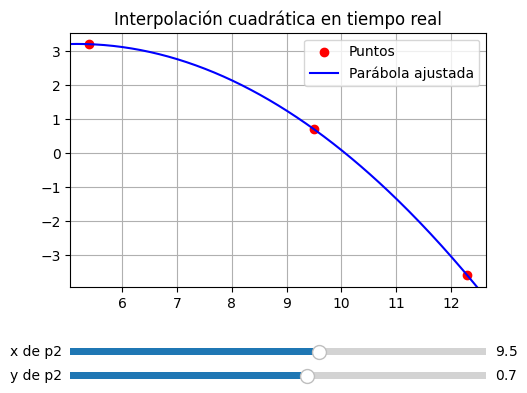

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Puntos fijos
p1 = (5.4, 3.2)
p3 = (12.3, -3.6)

# Punto p2 movible (inicial)
p2_init = [9.5, 0.7]

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)

# Puntos en arrays
x_vals = np.array([p1[0], p2_init[0], p3[0]])
y_vals = np.array([p1[1], p2_init[1], p3[1]])

# Gráfico base
sc = ax.scatter(x_vals, y_vals, color='red', label='Puntos')
(line,) = ax.plot([], [], label='Parábola ajustada', color='blue')
ax.legend()
ax.set_title('Interpolación cuadrática en tiempo real')
ax.grid(True)

# Ejes
x_fit = np.linspace(4, 14, 300)

# Sliders para mover p2
axcolor = 'lightgoldenrodyellow'
ax_x = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
ax_y = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

slider_x = Slider(ax_x, 'x de p2', 5.5, 12.2, valinit=p2_init[0])
slider_y = Slider(ax_y, 'y de p2', -5.0, 5.0, valinit=p2_init[1])

# Función de actualización
def update(val):
    p2_x = slider_x.val
    p2_y = slider_y.val
    x_vals = np.array([p1[0], p2_x, p3[0]])
    y_vals = np.array([p1[1], p2_y, p3[1]])
    
    # Ajuste cuadrático
    coeffs = np.polyfit(x_vals, y_vals, 2)
    y_fit = np.polyval(coeffs, x_fit)
    
    sc.set_offsets(np.column_stack((x_vals, y_vals)))
    line.set_data(x_fit, y_fit)
    fig.canvas.draw_idle()

slider_x.on_changed(update)
slider_y.on_changed(update)

update(None)  # primer render
plt.show()